In [171]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

# Import the numpy and pandas package

import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

#split data
from sklearn.model_selection import train_test_split

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm  

In [172]:
housing = pd.DataFrame(pd.read_csv("Housing_data_final(6).csv"))

In [173]:
# Check the head of the dataset
housing.head()

,price,area,bedrooms,bathrooms,washingmachine,dtcenter,hotwater,ac,parking,security
0,2475349,100,2,0,1,3.961712,1,0,1,1
1,2614983,104,2,0,1,3.529193,1,0,1,1
2,2468421,97,2,0,1,3.985575,1,0,1,1
3,2952767,114,2,0,1,2.773570,1,0,1,0
4,2791269,102,2,0,1,3.086280,0,1,1,1


In [174]:
housing.shape

(1635, 10)

In [175]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   price           1635 non-null   int64  
 1   area            1635 non-null   int64  
 2   bedrooms        1635 non-null   int64  
 3   bathrooms       1635 non-null   int64  
 4   washingmachine  1635 non-null   int64  
 5   dtcenter        1635 non-null   float64
 6   hotwater        1635 non-null   int64  
 7   ac              1635 non-null   int64  
 8   parking         1635 non-null   int64  
 9   security        1635 non-null   int64  
dtypes: float64(1), int64(9)
memory usage: 127.9 KB


In [176]:
# outlier treatment for area
Q1 = housing.area.quantile(0.25)
Q3 = housing.area.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.area >= Q1 - 1.5*IQR) & (housing.area <= Q3 + 1.5*IQR)]

In [177]:
# outlier treatment for price
Q1 = housing.price.quantile(0.25)
Q3 = housing.price.quantile(0.75)
IQR = Q3 - Q1
housing = housing[(housing.price >= Q1 - 1.5*IQR) & (housing.price <= Q3 + 1.5*IQR)]

In [178]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(housing, train_size = 0.7, test_size = 0.3, random_state = 100)

In [179]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [180]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'hotwater', 'ac', 'parking', 'security']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [181]:
y_train = df_train.pop('price')
X_train = df_train

In [182]:
lm = LinearRegression()
lm.fit(X_train, y_train)

print(lm.intercept_)
print(lm.coef_)

-0.17916293302534814
[ 0.58108383  0.01888678  0.21363225  0.04273221 -0.31933381  0.08414996
  0.0939859   0.18409857  0.08591205]


In [183]:
lm = sm.OLS(y_train,X_train).fit()   # Running the linear model

In [184]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features= PolynomialFeatures(degree=2, include_bias=True)
xp = polynomial_features.fit_transform(X_train)
xp.shape

model_2 = sm.OLS(y_train, xp).fit()

print(model_2.params)

const   -0.383172
x1       1.263679
x2       0.377199
x3      -0.011128
x4      -0.012789
x5       1.175721
x6       0.014773
x7      -0.005148
x8       0.402369
x9       0.026791
x10     -0.342110
x11     -0.427031
x12      0.233378
x13      0.082129
x14     -1.845768
x15     -0.073542
x16     -0.068011
x17     -0.256789
x18     -0.037606
x19     -0.119098
x20      0.025188
x21      0.037621
x22     -0.157133
x23     -0.003571
x24     -0.100695
x25     -0.074057
x26     -0.108232
x27      0.144062
x28     -0.019538
x29     -0.242445
x30      0.105580
x31      0.069125
x32     -0.206418
x33     -0.109996
x34     -0.012789
x35     -0.129165
x36      0.014336
x37      0.020721
x38      0.031043
x39      0.029870
x40     -0.169844
x41     -0.215993
x42     -0.256427
x43     -0.645255
x44     -0.220709
x45      0.014773
x46      0.104301
x47      0.037810
x48      0.036627
x49     -0.005148
x50      0.001541
x51      0.200338
x52      0.094530
x53      0.018638
x54     -0.073828
dtype: flo

In [185]:
#Let's see the summary of our linear model\
print(lm.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.937
Model:                            OLS   Adj. R-squared (uncentered):              0.936
Method:                 Least Squares   F-statistic:                              1768.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):                        0.00
Time:                        23:12:08   Log-Likelihood:                          848.03
No. Observations:                1085   AIC:                                     -1678.
Df Residuals:                    1076   BIC:                                     -1633.
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------

In [160]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
X = X_train
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,hotwater,10.79
2,bathrooms,8.56
7,parking,7.91
6,ac,7.60
8,security,4.27
0,area,3.93
3,washingmachine,2.63
4,dtcenter,2.17
1,bedrooms,1.35


In [161]:
print(model_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     111.6
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        23:11:28   Log-Likelihood:                 1154.6
No. Observations:                1085   AIC:                            -2205.
Df Residuals:                    1033   BIC:                            -1946.
Df Model:                          51                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.3832      0.078     -4.914      0.0

In [162]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [168]:
num_vars = ['price', 'area', 'bedrooms', 'bathrooms', 'washingmachine', 'dtcenter', 'dthospital', 'hotwater', 'ac', 'furnish', 'parking', 'security']

In [169]:
df_test[num_vars] = scaler.fit_transform(df_test[num_vars])

KeyError: "['price', 'dthospital', 'furnish'] not in index"

In [170]:
y_test = df_test.pop('price')
X_test = df_test

KeyError: 'price'

In [166]:
# Adding constant variable to test dataframe
#X_test = sm.add_constant(X_test)

In [167]:
def predict_prices_with_polynomial_model(model, polynomial_features, feature_names, new_data_dict_list):
    predictions = []

    for new_data_dict in new_data_dict_list:
        # Extract features from the dictionary
        new_data = [[new_data_dict[feature] for feature in feature_names]]

        # Transform the new input features using PolynomialFeatures
        new_data_transformed = polynomial_features.transform(new_data)

        # Make predictions using the trained model
        prediction = model.predict(new_data_transformed)
        predictions.append(prediction[0])

    return predictions

# Example usage:
new_data_dict_list = [
    {'area': 120, 'bedrooms': 3, 'bathrooms': 2, 'washingmachine': 1, 'dtcenter': 2, 'dtrec': 1,
     'dthospital': 3, 'hotwater': 1, 'ac': 1, 'furnish': 2, 'parking': 1, 'security': 1},
    # Add more dictionaries for additional instances
]   

predictions = predict_prices_with_polynomial_model(model_2, polynomial_features, num_vars[1:], new_data_dict_list)
print("Predicted Prices:", predictions)


ValueError: X has 12 features, but PolynomialFeatures is expecting 9 features as input.

In [22]:
xtt = polynomial_features.fit_transform(X_test)
y_pred_2 = model_2.predict(xtt) 

In [23]:
# Making predictions
y_pred = lm.predict(X_test)

In [24]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.7044736169617507

In [25]:
r2_score(y_test,y_pred_2)

0.6328110938283144

Text(0, 0.5, 'y_pred')

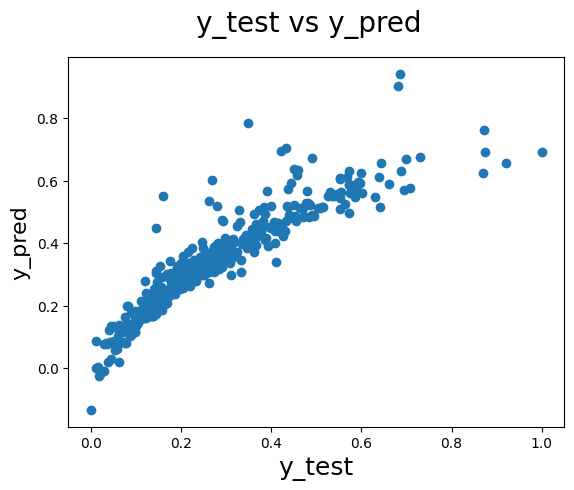

In [26]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

Text(0, 0.5, 'y_pred_2')

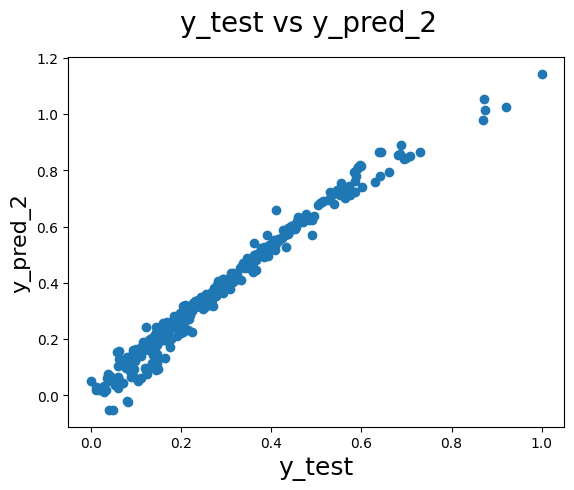

In [27]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred_2)
fig.suptitle('y_test vs y_pred_2', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred_2', fontsize=16)                          # Y-label